<h1 style='text-align: center;font-weight: bold;'>Project Proposal <br/> Road Accidents Analytics: UK case study</h1>


<h2>Group:</h2> 
<br/>
<ul>
<li>Rami Tailakh</li>
<li>Ameen Hussein</li>
</ul>

<h2>Goal: </h2> 

The main goal of this project is to identify the main factors correlating with fatal road accidents. This project will utilize the data of road and traffic accidents registered in the UK. The targeted data will be prepared and visualized using different graphs in an attempt to analyze the causes and identify the likelihood of accidents, according to different factors that could be (but not limited to): driver’s gender, vehicle category, season, weather conditions, day of the week, time and location of accidents.

Datasets:
<a href='https://www.kaggle.com/silicon99/dft-accident-data' target='_blank' >UK Car Accidents 2005-2015</a>

<h2>Potential Beneficiaries: </h2> 
<ol>
<li>Awareness-raising bodies</li>
<li>Insurance Companies</li>
<li>Ministry of Transportation</li>
<li>Traffic Police</li>
</ol>


## Data Pereprocessing

In [142]:
%pylab inline
from sqlalchemy import create_engine
import statsmodels.api as sm

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np
%matplotlib inline

def get_lookupTable(file,code='code',label='label'):
    lookupTable={}
    df_lookupTable =  pd.read_csv(file)
    for i in range(0, len(df_lookupTable)):
        lookupTable[df_lookupTable.iloc[i][code]]=df_lookupTable.iloc[i][label]
    return lookupTable

Populating the interactive namespace from numpy and matplotlib


In [144]:
import warnings
warnings.filterwarnings('ignore')

In [145]:
df_Vehicles0515=pd.read_csv('data/Vehicles0515.csv',usecols=[0,1,2,4,6,11,14,15,16]) # اخر عمود بسبب مشكله لهذا تم تحديد الاعمدة المطلوبة
df_Vehicles0515['Vehicle_Type'].replace(get_lookupTable('data/lookup/Vehicle_Type.csv'), inplace=True)
df_Vehicles0515.head()

,Accident_Index,Vehicle_Reference,Vehicle_Type,Vehicle_Manoeuvre,Junction_Location,1st_Point_of_Impact,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver
0,200501BS00001,1,Car,18,0,1,2,74,10
1,200501BS00002,1,Bus or coach (17 or more pass seats),4,3,4,1,42,7
2,200501BS00003,1,Bus or coach (17 or more pass seats),17,0,4,1,35,6
3,200501BS00003,2,Car,2,0,3,1,62,9
4,200501BS00004,1,Car,18,0,1,2,49,8


In [146]:
df_Accidents  = pd.read_csv('data/Accidents0515.csv'  )
df_Severity= pd.read_csv('data/lookup/Accident_Severity.csv')
Severity_Type=df_Severity[['code','label']].set_index('code').to_dict()
df_Accidents['Severity_Type'] = df_Accidents['Accident_Severity'].map(Severity_Type['label'])
df_Accidents['Date2'] = pd.to_datetime(df_Accidents['Date'], format='%d/%m/%Y')
df_Accidents['Day_of_Week'].replace(get_lookupTable('data/lookup/Day_of_Week.csv'), inplace=True)
Vehicle_Type=df_Vehicles0515[['Accident_Index','Vehicle_Type']].set_index('Accident_Index').to_dict()
df_Accidents['Vehicle_Type'] = df_Accidents['Accident_Index'].map(Vehicle_Type['Vehicle_Type'])
df_Accidents.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Severity_Type,Date2,Vehicle_Type
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,...,2,2,0,0,1,1,E01002849,Serious,2005-01-04,Car
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,...,1,1,0,0,1,1,E01002909,Slight,2005-01-05,Bus or coach (17 or more pass seats)
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,...,1,1,0,0,1,1,E01002857,Slight,2005-01-06,Car
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,...,1,1,0,0,1,1,E01002840,Slight,2005-01-07,Car
4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,...,1,2,0,0,1,1,E01002863,Slight,2005-01-10,Motorcycle 125cc and under


## EDA

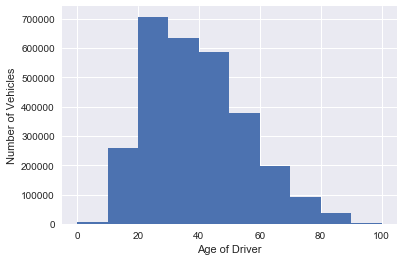

In [147]:
bin_edges= [0,10,20,30,40,50,60,70,80,90,100]
_=plt.hist(df_Vehicles0515['Age_of_Driver'], bins = bin_edges)
_=plt.xlabel('Age of Driver')
_=plt.ylabel('Number of Vehicles')
plt.show()

In [148]:
#df_Driver_Sex_Male= df_Vehicles0515[(df_Vehicles0515.Sex_of_Driver == 1)&((df_Vehicles0515.Age_of_Driver>=20)&(df_Vehicles0515.Age_of_Driver<51))]
df_Driver_Sex_Male= df_Vehicles0515[df_Vehicles0515.Sex_of_Driver == 1]
df_Driver_Sex_Female= df_Vehicles0515[df_Vehicles0515.Sex_of_Driver == 2]
Male_Accident=len(df_Driver_Sex_Male)
Female_Accident=len(df_Driver_Sex_Female)
total_Accident=len(df_Vehicles0515)
per_Male_Accident=(Male_Accident/total_Accident)*100
per_Female_Accident=(Female_Accident/total_Accident)*100
print('Male_Accident=',format(round(per_Male_Accident,1)),'%')
print('Female_Accident=',format(round(per_Female_Accident,1)),'%')

Male_Accident= 65.8 %
Female_Accident= 28.3 %


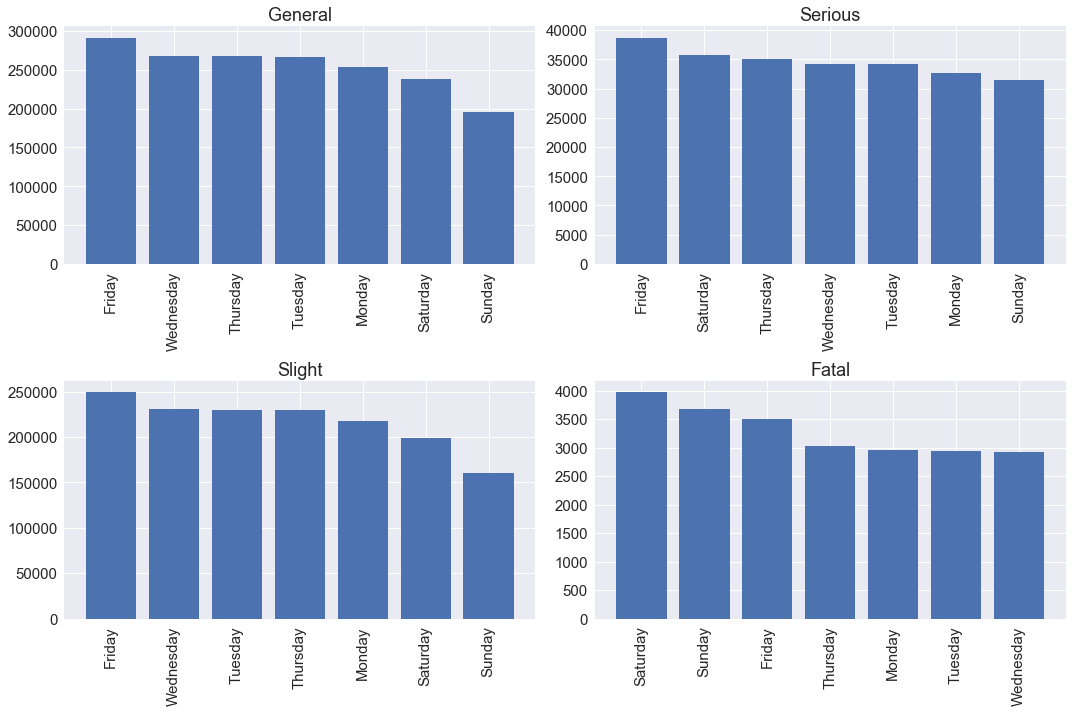

In [150]:
from collections import Counter
plt.figure(figsize=(15,10))
def histogram_label(df,i,Severity=-1):
    if Severity!=-1:
        df=df[df.Severity_Type==Severity]
    else:
        Severity='General'
    Day_of_Week = df.Day_of_Week
    Day_counts = Counter(Day_of_Week)

    common = Day_counts.most_common()
    labels = [item[0] for item in common]
    number = [item[1] for item in common]
    nbars = len(common)
    plt.subplot(2,2,i)
    plt.xticks(rotation=90,fontsize=15)
    plt.yticks(fontsize=15)
    plt.title(Severity, fontsize=18)
    plt.bar(np.arange(nbars), number, tick_label=labels)
    
    
    
histogram_label(df_Accidents,1)   
histogram_label(df_Accidents,2,'Serious')
histogram_label(df_Accidents,3,'Slight')
histogram_label(df_Accidents,4,'Fatal')

plt.tight_layout()
plt.show()


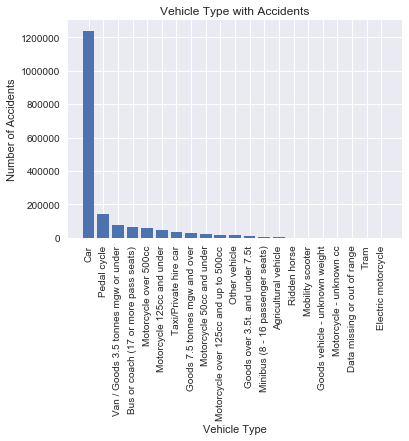

In [151]:
Vehicle_Type = df_Accidents.Vehicle_Type
Vehicle_counts = Counter(Vehicle_Type)

common = Vehicle_counts.most_common()
labels = [item[0] for item in common]
number = [item[1] for item in common]
nbars = len(common)
plt.xticks(rotation=90)
plt.title('Vehicle Type with Accidents')
_=plt.ylabel('Number of Accidents')
_=plt.xlabel('Vehicle Type')
plt.bar(np.arange(nbars), number, tick_label=labels)
plt.show()
    


In [152]:
df_Accidents=df_Accidents[df_Accidents.Vehicle_Type=='Car']
#df_Accidents['datetime'] = pd.to_datetime(df_Accidents["Date"].map(str) +" " + df_Accidents["Time"])
df_Accidents_Fatal= df_Accidents[df_Accidents.Severity_Type=='Fatal']
df_Accidents_Serious= df_Accidents[df_Accidents.Severity_Type=='Serious']
df_Accidents_Slight= df_Accidents[df_Accidents.Severity_Type=='Slight']

As seen from the Plot above the car has the majority number of accidents according to vehicle_type field, therefore, our study will only choose car accident observations.

### Accident according to Road Type feature

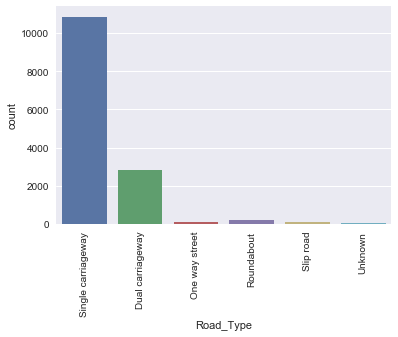

In [153]:
df_Road_Type=df_Accidents_Fatal
df_Road_Type['Road_Type'].replace(get_lookupTable('data/lookup/Road_Type.csv'), inplace=True)

_= sns.countplot(data=df_Road_Type, x="Road_Type")
for label in _.get_xticklabels():
    label.set_rotation(90)


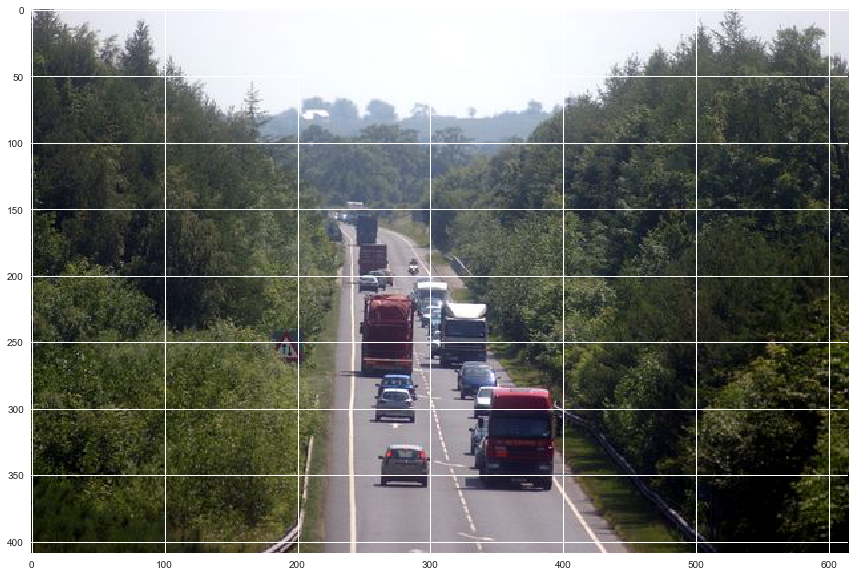

In [154]:
import matplotlib.image as mpimg
plt.figure(figsize=(15,10))
img=mpimg.imread('a1-single-carriageway.jpg')
plt.imshow(img);

The follwoing map plot will show the density of accidents


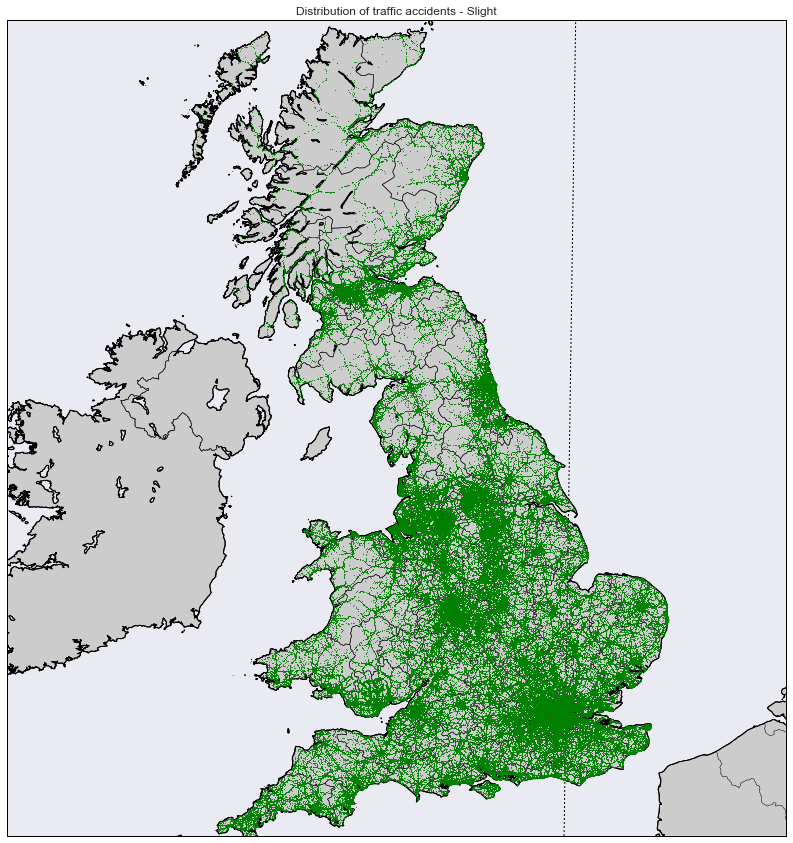

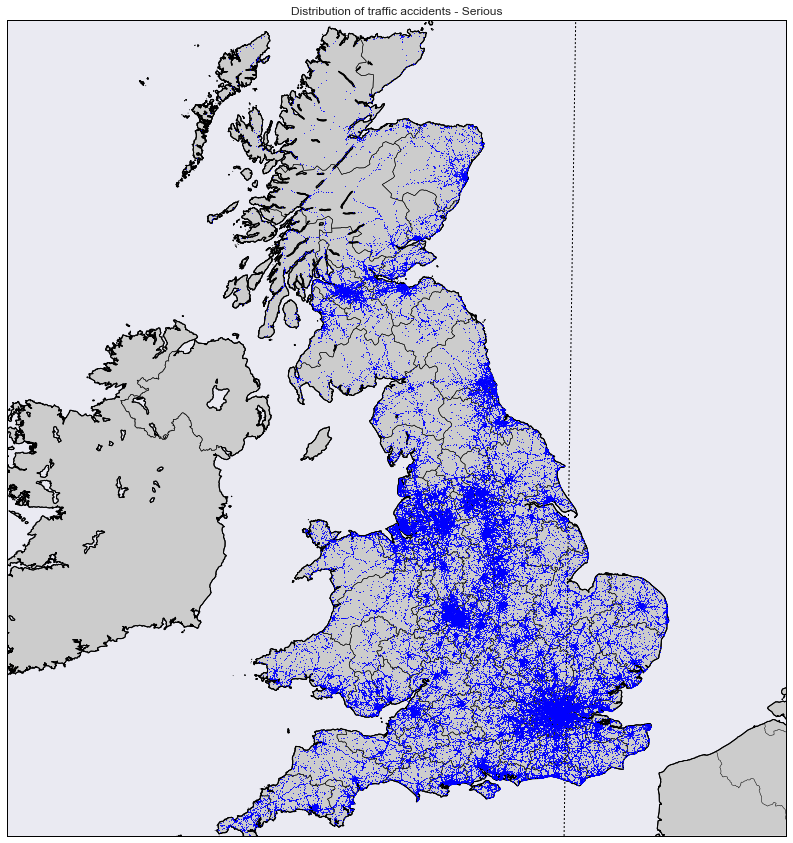

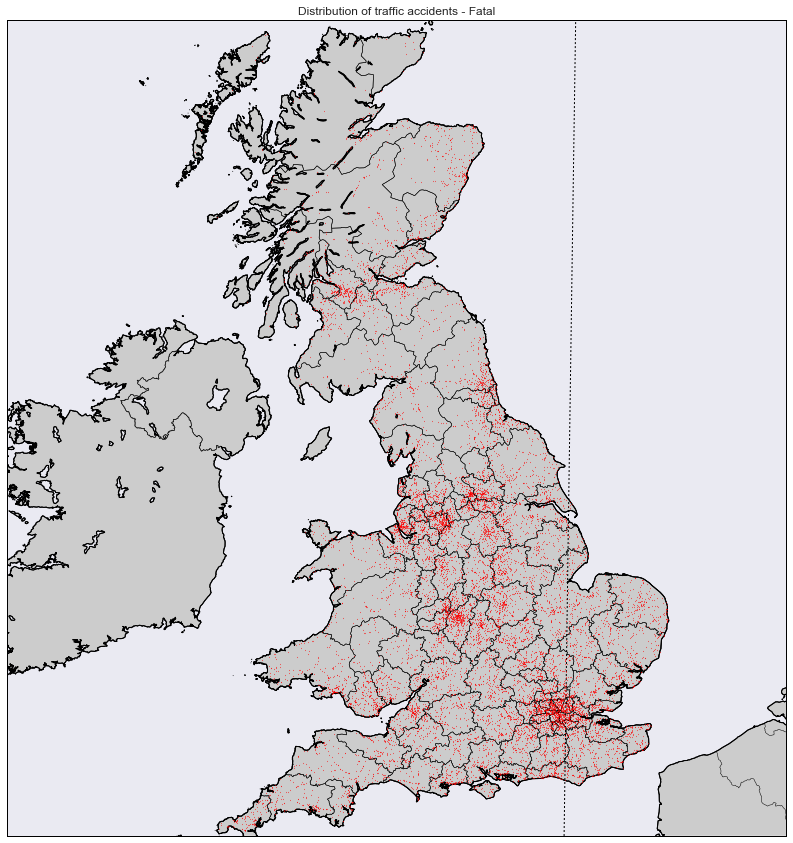

In [155]:
print("The follwoing map plot will show the density of accidents")
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np


def mapAccident_Severity(Severity,color) :
    df_Accidents_Severity=df_Accidents[df_Accidents.Severity_Type==Severity]
    plt.figure(figsize=(20,15)) 
    map = Basemap(projection='tmerc', lat_0=54, lon_0=1,
    resolution = 'h',  area_thresh = 0.1,
    llcrnrlon=-9.111745, llcrnrlat=49.761209,
    urcrnrlon=4.298973, urcrnrlat=58.797658)
 
    map.drawcoastlines()
    map.drawcountries()
    map.fillcontinents(color='white')
    map.drawmapboundary()
 
    map.drawmeridians(np.arange(0, 360, 30))
    map.drawparallels(np.arange(-90, 90, 30))
    map.fillcontinents()
    map.drawcoastlines()
    map.drawcounties(zorder=0, color='white')
    map.readshapefile('data/postcode/Areas', 'areas')
    Longitudes= pd.np.array(df_Accidents_Severity.Longitude)
    Latitudes= pd.np.array(df_Accidents_Severity.Latitude)
    x,y = map(Longitudes, Latitudes)
    map.plot(x, y, color, markersize=1)
  
    plt.title('Distribution of traffic accidents - '+Severity)
    plt.show()


mapAccident_Severity('Slight','og') 
mapAccident_Severity('Serious','bo')   
mapAccident_Severity('Fatal','rd')

Counter({'Slight': 1080145, 'Serious': 144134, 'Fatal': 14123})
['Slight', 'Serious', 'Fatal']


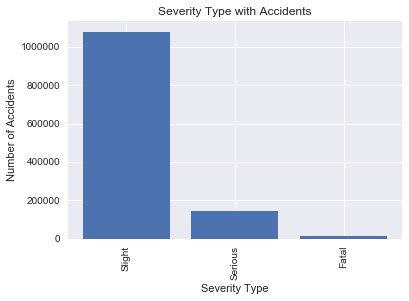

In [156]:
Severity_Type = df_Accidents.Severity_Type
Severity_counts = Counter(Severity_Type)
print(Severity_counts)
common = Severity_counts.most_common()
labels = [item[0] for item in common]
number = [item[1] for item in common]
print(labels)
nbars = len(common)
plt.xticks(rotation=90)
plt.title('Severity Type with Accidents')
_=plt.ylabel('Number of Accidents')
_=plt.xlabel('Severity Type')
plt.bar(np.arange(nbars), number, tick_label=labels)
plt.show()

As seen in the bar plot above the majaority of accidents are sligh from severity perspective, and so, our study will work on the fatal severity

## Hypothesis Test:

### This piece of code is to calculate percentage of sever accidents of the population dataset

In [158]:
Severity_Accidents_general_counts = Counter(df_Accidents.Vehicle_Type)
Severity_Accidents_Fatal_counts=Counter(df_Accidents_Fatal.Vehicle_Type)

per_car_Slight=(len(df_Accidents_Slight)/len(df_Accidents))*100
per_car_Serious=(len(df_Accidents_Serious)/len(df_Accidents))*100
per_car_fatal=(len(df_Accidents_Fatal)/len(df_Accidents))*100

print('The Total accidents cars=',len(df_Accidents))
print('The Total accidents cars Severity_Slight=',len(df_Accidents_Slight),'=',format(round(per_car_Slight,3)),'%')
print('The Total accidents cars Severity_Serious=',len(df_Accidents_Serious),'=',format(round(per_car_Serious,3)),'%')
print('The Total accidents cars Severity_Fatal=',len(df_Accidents_Fatal),'=',format(round(per_car_fatal,3)),'%')

The Total accidents cars= 1238402
The Total accidents cars Severity_Slight= 1080145 = 87.221 %
The Total accidents cars Severity_Serious= 144134 = 11.639 %
The Total accidents cars Severity_Fatal= 14123 = 1.14 %


In [161]:
# The percentage of each accident according to its accident_severity will be assigned to each observation as the follwoing:
df_Accidents.loc[df_Accidents['Accident_Severity'] == 1, 'Accident_Severity'] =format(round(per_car_fatal,3))
df_Accidents.loc[df_Accidents['Accident_Severity'] == 2, 'Accident_Severity'] =format(round(per_car_Serious,3))
df_Accidents.loc[df_Accidents['Accident_Severity'] == 3, 'Accident_Severity'] =format(round(per_car_Slight,3))
df_Accidents.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Severity_Type,Date2,Vehicle_Type
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,11.639,1,1,04/01/2005,...,2,2,0,0,1,1,E01002849,Serious,2005-01-04,Car
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,87.221,2,1,06/01/2005,...,1,1,0,0,1,1,E01002857,Slight,2005-01-06,Car
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,87.221,1,1,07/01/2005,...,1,1,0,0,1,1,E01002840,Slight,2005-01-07,Car
6,200501BS00007,524220.0,180830.0,-0.211277,51.512695,1,87.221,2,1,13/01/2005,...,1,1,0,0,1,1,E01002875,Slight,2005-01-13,Car
7,200501BS00009,525890.0,179710.0,-0.187623,51.502260,1,87.221,1,2,14/01/2005,...,1,1,0,0,1,1,E01002889,Slight,2005-01-14,Car


In [162]:
mean=df_Accidents['Accident_Severity'].astype(float).mean()
print("Mean: ",mean,'\n')

std=df_Accidents['Accident_Severity'].astype(float).std()
print("Standard deviation: ",std,'\n')

Mean:  77.44254522494165 

Standard deviation:  25.56881383151318 



### Time-Series Plot

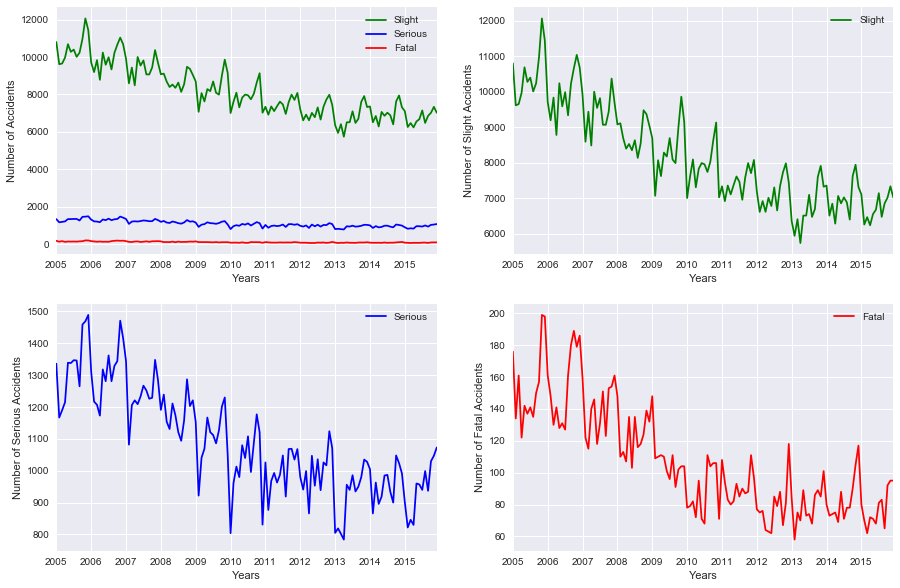

In [163]:
#Fatal Serious Slight
def AccidentsDates(Severity):
    df_Accidents_type_Severity= df_Accidents[df_Accidents.Severity_Type==Severity]
    pd.DatetimeIndex(df_Accidents_type_Severity.Date2).to_period("M")
    per = df_Accidents_type_Severity.Date2.dt.to_period("M")  # new way to get the same
    g = df_Accidents_type_Severity.groupby(per)
    g=g.count()
    g.rename(columns={'Date2': Severity}, inplace=True)
    df_Severity=pd.DataFrame(g[Severity])
    df_Severity['date'] = df_Severity.index.values
    return  df_Severity


df_Slight=AccidentsDates('Slight')
df_Serious=AccidentsDates('Serious')
df_Fatal=AccidentsDates('Fatal')

fig = plt.figure(figsize=(15,10))


ax1 = fig.add_subplot(221)
_=df_Slight.plot(color='Greens',ax=ax1)
_=df_Serious.plot(color='Blues',ax=ax1)
_=df_Fatal.plot(color='Reds',ax=ax1)

ax2 = fig.add_subplot(222)
df_Sl =df_Slight.plot(color='Greens',ax=ax2)

ax3 = fig.add_subplot(223)
df_Se =df_Serious.plot(color='Blues',ax=ax3)

ax4 = fig.add_subplot(224)
df_F =df_Fatal.plot(color='Reds',ax=ax4)
_.set_xlabel("Years")
_.set_ylabel("Number of Accidents")
df_Sl.set_xlabel("Years")
df_Sl.set_ylabel("Number of Slight Accidents")
df_Se.set_xlabel("Years")
df_Se.set_ylabel("Number of Serious Accidents")
df_F.set_xlabel("Years")
df_F.set_ylabel("Number of Fatal Accidents")





According to the above 4 time-series figures, it can be seen that there is a decreasing trend of the number of accidents between the years 2005 and 2015, and therefore, our assumptions will be as the follwoing:

Ho: percentage of fatal car accidents > 1.14 <br>
Ha: percentage of fatal car accidents <= 1.14

Where 1.14 is the percentage of Fatal car accidents

# Sample Dataset

In [172]:
# We have chosen a sample of 100000 observations
n=100000
sample_data_general = df_Accidents.sample(n,random_state=42)
sample_data_Fatal=sample_data_general[sample_data_general.Severity_Type=='Fatal']
sample_per_car_fatal=(len(sample_data_Fatal)/len(sample_data_general))*100
print('The Total accidents cars=',len(sample_data_general))
print('The Total accidents cars Severity_Fatal=',len(sample_data_Fatal))
print('The percentage of fatal accidents through cars=',format(round(sample_per_car_fatal,5)),'%')

The Total accidents cars= 100000
The Total accidents cars Severity_Fatal= 1168
The percentage of fatal accidents through cars= 1.168 %


Counter({'Slight': 87188, 'Serious': 11644, 'Fatal': 1168})
['Slight', 'Serious', 'Fatal']


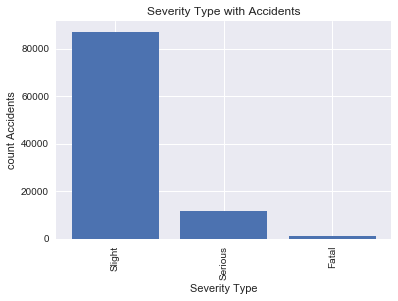

In [173]:
Severity_Type = sample_data_general.Severity_Type
Severity_counts = Counter(Severity_Type)
print(Severity_counts)
common_ = Severity_counts.most_common()
labels = [item[0] for item in common_]
number = [item[1] for item in common_]
print(labels)
nbars = len(common_)
plt.xticks(rotation=90)
plt.title('Severity Type with Accidents')
_=plt.ylabel('count Accidents')
_=plt.xlabel('Severity Type')
plt.bar(np.arange(nbars), number, tick_label=labels)
plt.show()


In [174]:
print("Mean sample: \n")

mean_sample=sample_data_general['Accident_Severity'].astype(float).mean()
print(mean)
print("\nStandard deviation: \n")
std_sample=sample_data_general['Accident_Severity'].astype(float).std()
print(std)


Mean sample: 

77.44254522494165

Standard deviation: 

25.56881383151318


#### Calculating mean difference between population and dataset.

In [175]:
print(format(round(sample_per_car_fatal-per_car_fatal,5)),'%')

0.02758 %


As shown above, there is no significant difference.

## Z-Test

In [176]:
z=(mean_sample-mean)/(std/np.sqrt(n))
z

-0.34307276845143131

As shown, z value is within the Normal Distribution, and so, we reject the null hypothesis and we accept the alternative one. Therefore, the percentage of fatal accident will be < 1.14%

# Machine Learning

## Classification

As show from the dataset utilized, it can be seen the data is categorized rather than quantified, and therefore, we selected the Decision-Tree model for classification. The taget in our dataset is the Accidet_Severity which could be: Fatal, Serious or Slight.

In [217]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

df_Accidents_ML  = pd.read_csv('data/Accidents0515.csv')
y = df_Accidents_ML.Accident_Severity

%matplotlib inline


In [178]:
X = df_Accidents_ML[[
       'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions']]

In [179]:
X_train, X_test, y_train, y_test = train_test_split(X,y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1335489, 6) (445164, 6) (1335489,) (445164,)


In [180]:
clf_1 = DecisionTreeClassifier().fit(X_train, y_train)
clf_2 = DecisionTreeClassifier().fit(X_test, y_test)
z1 = clf_1.predict(X_train)
z2 = clf_2.predict(X_test)
print(len(X_train), len(y_train), len(z1))
print(len(X_test), len(y_test), len(z2))

1335489 1335489 1335489
445164 445164 445164


In [181]:
X_train['target_actual'] = y_train
X_train['target_expected'] = z1
X_train.head()

,Road_Type,Speed_limit,Junction_Detail,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,target_actual,target_expected
1315151,6,30,3,1,1,1,2,3
1374163,6,30,6,4,1,1,3,3
881684,3,50,0,1,1,1,3,3
2642,6,30,6,1,1,1,3,3
406510,6,30,3,1,1,1,3,3


In [182]:
X_test['target_actual'] = y_test
X_test['target_expected'] = z2
X_test.head()

,Road_Type,Speed_limit,Junction_Detail,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,target_actual,target_expected
391093,6,30,6,1,1,1,3,3
668097,6,60,0,1,1,1,2,3
1249816,6,30,9,4,1,2,3,3
1655678,6,30,3,4,1,2,3,3
799935,6,30,3,1,1,1,3,3


In [183]:
print(len(X_test))
X_test['result'] = np.where(X_test['target_actual'] == X_test['target_expected'] 
                     , 1, 0)
X_test.head()

445164


,Road_Type,Speed_limit,Junction_Detail,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,target_actual,target_expected,result
391093,6,30,6,1,1,1,3,3,1
668097,6,60,0,1,1,1,2,3,0
1249816,6,30,9,4,1,2,3,3,1
1655678,6,30,3,4,1,2,3,3,1
799935,6,30,3,1,1,1,3,3,1


## Prediction Error percentage between actual and predicted

In [184]:
X_test.result.astype(int)
count_false=len(X_test[(X_test['result']==0)])
count_true=len(X_test[(X_test['result']==1)])
Size=len(X_test)
PerPreErr=(count_false/Size)*100
print('false=',count_false,'\ntrue=',count_true,'\nSize=',Size)
print('Prediction Error=',format(round(PerPreErr,2)),'%')


false= 65912 
true= 379252 
Size= 445164
Prediction Error= 14.81 %


### Trying to balance between the train and test datasets

In [185]:
size=0.4
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=size)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

clf_1 = DecisionTreeClassifier().fit(X_train, y_train)
clf_2 = DecisionTreeClassifier().fit(X_test, y_test)
z1 = clf_1.predict(X_train)
z2 = clf_2.predict(X_test)


X_train['target_actual'] = y_train
X_train['target_expected'] = z1
X_train.head()

X_test['target_actual'] = y_test
X_test['target_expected'] = z2



X_test['result'] = np.where(X_test['target_actual'] == X_test['target_expected'] 
                     , 1, 0)


X_test.result.astype(int)
count_false=len(X_test[(X_test['result']==0)])
count_true=len(X_test[(X_test['result']==1)])
Size=len(X_test)
PerPreErr=(count_false/Size)*100
print('false=',count_false,'\ntrue=',count_true,'\nSize=',Size)
print('Prediction Error=',format(round(PerPreErr,2)),'%')

(1068391, 6) (712262, 6) (1068391,) (712262,)
false= 105721 
true= 606541 
Size= 712262
Prediction Error= 14.84 %


# Linear Regression Model

<p>In the previous section, the classification has been performed using the Decision-Tree model based on the assumption that our data is categorized rather than quantified, however, we have created a new dataset that aggregates; counting the number of accidents, our data according to different attribute, where our target (class) is the number of fatal accidents. This section will test using the Linear regression classification model as it will be shown.</p>

In [199]:
import sklearn
from sklearn.linear_model import LinearRegression

In [200]:
# Create a LinearRegression Object
lreg = LinearRegression()

In [220]:
# Working on the most expectedly affecting features
df_Accidents_Fatal=df_Accidents_ML[(df_Accidents_ML.Accident_Severity==1)]
df_Accidents_Fatal=df_Accidents_Fatal[[
       'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions']]


df_Accidents_Fatal.head()

,Road_Type,Speed_limit,Junction_Detail,Light_Conditions,Weather_Conditions,Road_Surface_Conditions
824,2,30,3,1,1,1
16252,6,30,3,1,1,1
17413,6,30,6,1,1,2
17415,6,30,3,1,1,1
17420,6,30,6,1,1,1


Aggregating our data grouped by the chosen features and create a new dataframe. Notice that our taret refers to the numver (count) of accidents according to the graoup by calus


In [248]:
def highlight_t(s):
    return ['background-color: orange' for v in s]

df_Fatal_ML=pd.DataFrame(df_Accidents_Fatal.groupby(['Road_Type', 'Speed_limit','Junction_Detail', 'Light_Conditions','Weather_Conditions', 'Road_Surface_Conditions']).size().reset_index(name = "Target"))
df_Fatal_ML.head().style.apply(highlight_t,subset=['Target'])


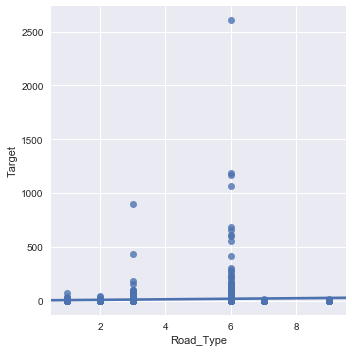

In [222]:
sns.lmplot('Road_Type','Target',data = df_Fatal_ML)

In [223]:
# Data Columns
X_multi = df_Fatal_ML.drop('Target',1)

# Targets
Y_target = df_Fatal_ML.Target



In [224]:
# Implement Linear Regression
lreg.fit(X_multi,Y_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [225]:
print(' The estimated intercept coefficient is %.2f ' %lreg.intercept_)

 The estimated intercept coefficient is 41.20 


In [226]:
print(' The number of coefficients used was %d ' % len(lreg.coef_))

 The number of coefficients used was 6 


In [240]:
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: orange' if v else '' for v in is_max]


# Set a DataFrame from the Features
coeff_df = pd.DataFrame(df_Fatal_ML.columns)
coeff_df.columns = ['Features']

# Set a new column lining up the coefficients from the linear regression
coeff_df["Coefficient Estimate"] = pd.Series(lreg.coef_)
# Show
coeff_df.style.apply(highlight_max,subset=['Coefficient Estimate'])

# Training and Validation

In [228]:
# Grab the output and set as X and Y test and train data sets!
#X_train, X_test, Y_train, Y_test = sklearn.cross_validation.train_test_split(X,df_Fatal_ML.Target)

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_multi,df_Fatal_ML.Target)

In [229]:
# Print shapes of the training and testing data sets
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(1042, 6) (348, 6) (1042,) (348,)


In [230]:
# Create our regression object
lreg = LinearRegression()

# Once again do a linear regression, except only on the training sets this time
lreg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [231]:
# Predictions on training and testing sets
pred_train = lreg.predict(X_train)
pred_test = lreg.predict(X_test)

In [232]:
print("Fit a model X_train, and calculate MSE with Y_train: %.2f"  % np.mean((Y_train - pred_train) ** 2))
    
print("Fit a model X_train, and calculate MSE with X_test and Y_test: %.2f"  %np.mean((Y_test - pred_test) ** 2))

Fit a model X_train, and calculate MSE with Y_train: 10194.39
Fit a model X_train, and calculate MSE with X_test and Y_test: 9471.32


# Residual Plots

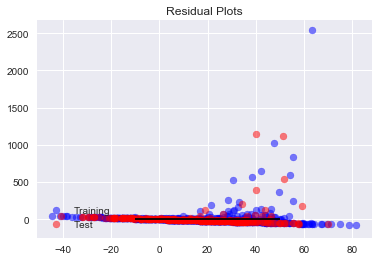

In [233]:
# Scatter plot the training data
train = plt.scatter(pred_train,(Y_train-pred_train),c='b',alpha=0.5)

# Scatter plot the testing data
test = plt.scatter(pred_test,(Y_test-pred_test),c='r',alpha=0.5)

# Plot a horizontal axis line at 0
plt.hlines(y=0,xmin=-10,xmax=50)

#Labels
plt.legend((train,test),('Training','Test'),loc='lower left')
plt.title('Residual Plots')

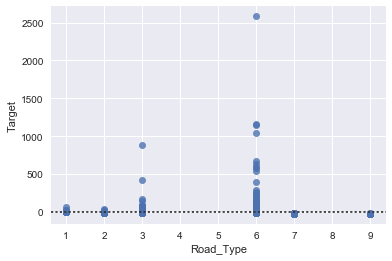

In [234]:
# Residual plot of all the dataset using seaborn
sns.residplot('Road_Type', 'Target', data = df_Fatal_ML)